## Logistic Regression Exercise
Consider the iris dataset containing information about iris flowers, including
their species (setosa, versicolor, or virginica). Use logistic regression to classify
iris species based on features such as sepal length, sepal width, petal length,
and petal width.


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [24]:
# load the dataset
iris = load_iris()
X = iris.data # feature data (sepal length, sepal width, petal length, petal width)
y = iris.target # target labels (the species of each iris)
feature_names = iris.feature_names
target_names = iris.target_names

# convertion to dataframe
df = pd.DataFrame(X, columns=feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


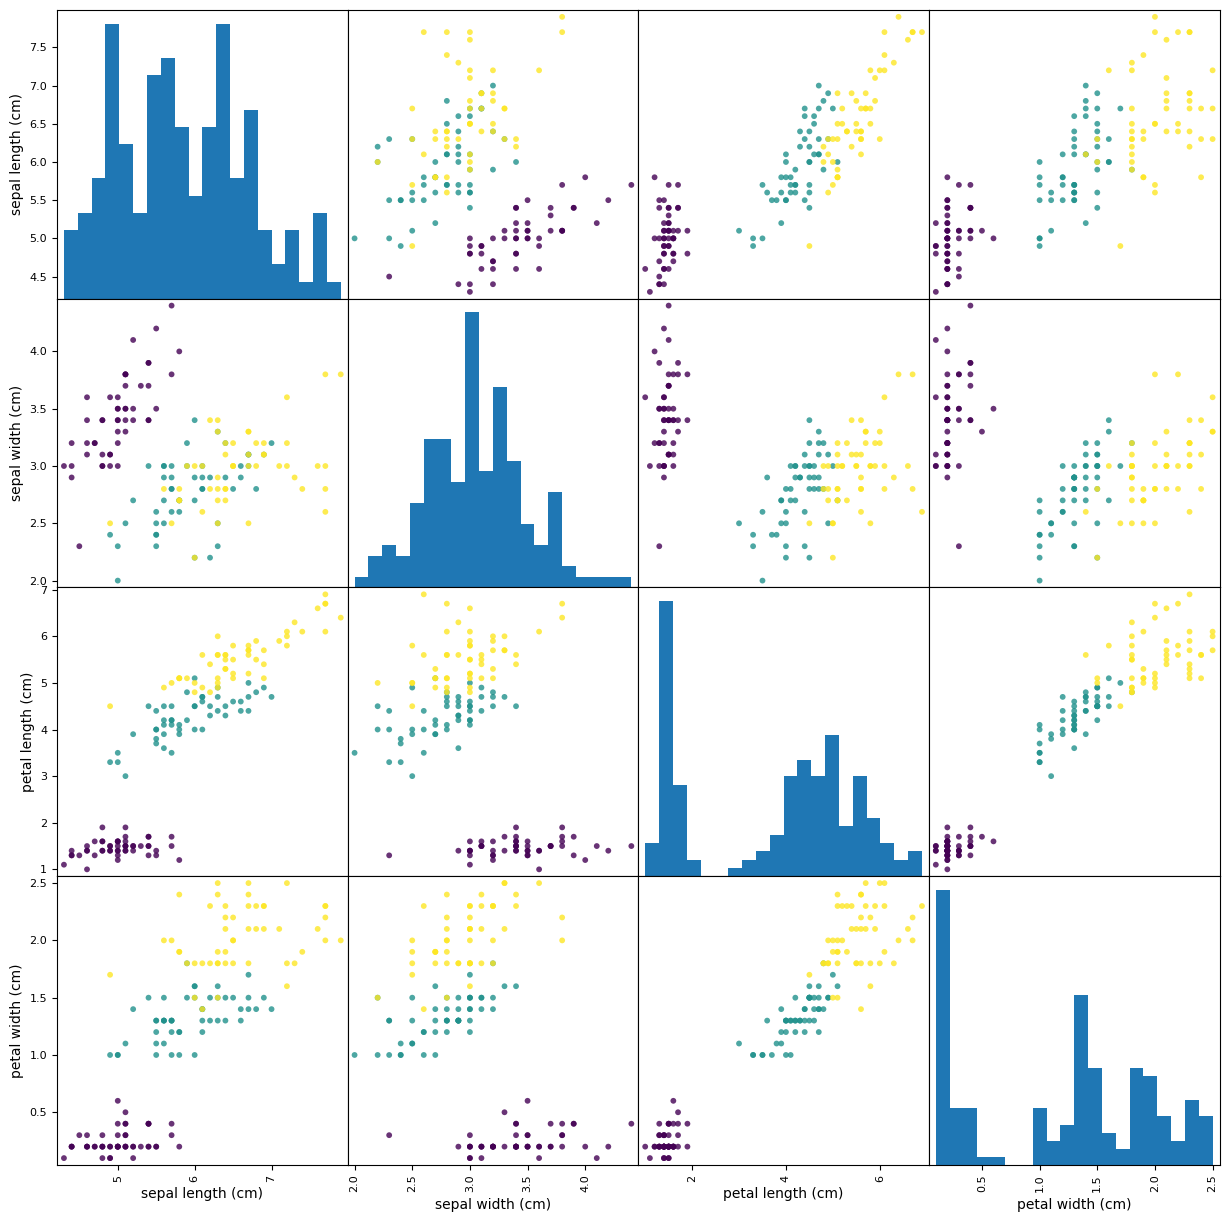

In [25]:
# visualization
# df.iloc[:, :4]: selects all rows and the first four columns
# c=y: Colors each point by its species
pd.plotting.scatter_matrix(df.iloc[:, :4], c=y, figsize=(15, 15),hist_kwds={'bins': 20}, s=70, alpha=.8)
plt.show()

In [26]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
logreg = LogisticRegression(max_iter=200) # initializes the Logistic Regression model with a maximum of 200 iterations
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [28]:
# predicting the test set results
y_pred = logreg.predict(X_test)


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred)) # shows the numbers of correct and incorrect predictions for each class
print("\nClassification Report:\n", classification_report(y_test, y_pred)) # displays key metrics (precision, recall, f1-score, support) for each class
print("Accuracy Score:", accuracy_score(y_test, y_pred)) # calculates the overall accuracy of the model on the testing set


Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy Score: 1.0


## Regularization Exercise
Develop a regression model using Ridge (L2 regularization) and Lasso (L1 regularization) techniques. Experiment with different regularization parameters and
evaluate the model’s performance.

In [36]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [37]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.data[:, 2] # petal length is selected for y

In [38]:
X = np.delete(X, 2, axis=1)  # Remove petal length from features

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [39]:
# Define different alpha values for Ridge regularization
ridge_alphas = [0.01, 0.1, 1, 10, 100]
ridge_train_errors = []
ridge_test_errors = []

# Train and evaluate Ridge models
for alpha in ridge_alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_train_errors.append(mean_squared_error(y_train, ridge.predict(X_train)))
    ridge_test_errors.append(mean_squared_error(y_test, ridge.predict(X_test)))

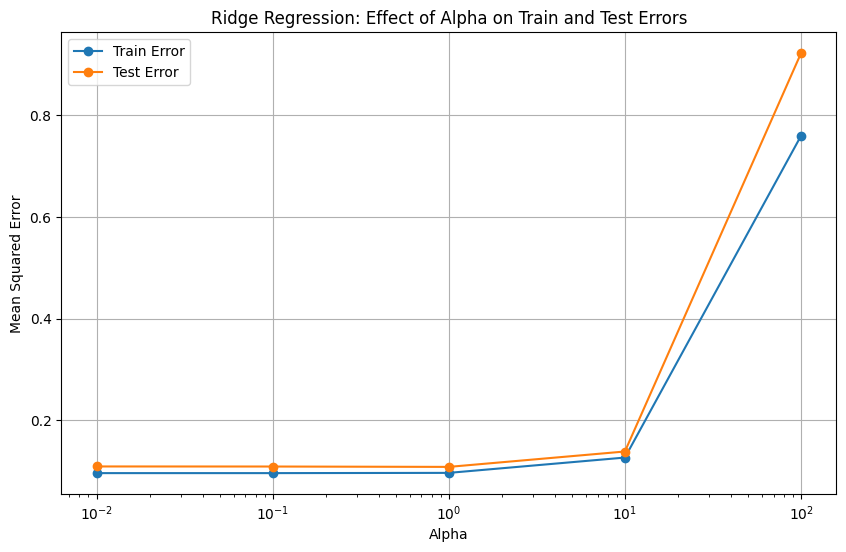

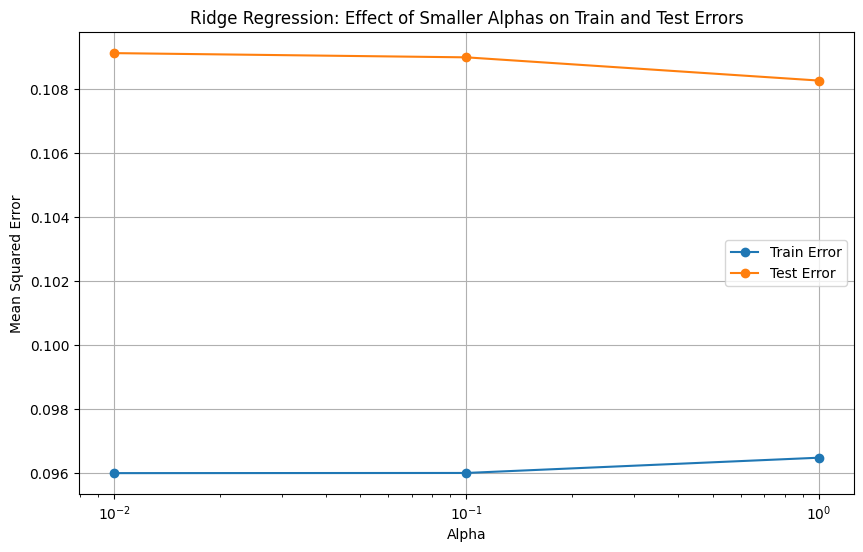

In [40]:
# Plot the training and testing errors
plt.figure(figsize=(10, 6))
plt.plot(ridge_alphas, ridge_train_errors, label='Train Error', marker='o')
plt.plot(ridge_alphas, ridge_test_errors, label='Test Error', marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression: Effect of Alpha on Train and Test Errors')
plt.legend()
plt.grid(True)
plt.show()

# Plot the results for smaller alpha values only (0.01, 0.1, 1)
small_alphas = ridge_alphas[:3]
small_train_errors = ridge_train_errors[:3]
small_test_errors = ridge_test_errors[:3]

plt.figure(figsize=(10, 6))
plt.plot(small_alphas, small_train_errors, label='Train Error', marker='o')
plt.plot(small_alphas, small_test_errors, label='Test Error', marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression: Effect of Smaller Alphas on Train and Test Errors')
plt.legend()
plt.grid(True)
plt.show()

### Conclusion

* **Optimal Regularization:** The best performance (lowest test errors) occurs for smaller alpha values (0.01, 0.1, 1). Among these, **alpha = 1 has the lowest test error (0.1083),** indicating that it provides a good balance between bias and variance.
* **Underfitting with High Alpha:** As alpha increases, both training and test errors increase, indicating that the model starts to underfit due to excessive regularization.
* **Overfitting with Very Low Alpha:** Although not shown here, if alpha were too close to zero, the model might overfit, but with alpha values tested here, overfitting is not observed.

In [44]:
# Define different alpha values for Lasso regularization
lasso_alphas = [0.01, 0.1, 1, 10, 100]
lasso_train_errors = []
lasso_test_errors = []

# Train and evaluate Lasso models
for alpha in lasso_alphas:
    lasso = Lasso(alpha=alpha)    
    lasso.fit(X_train, y_train)
    lasso_train_errors.append(mean_squared_error(y_train, lasso.predict(X_train)))
    lasso_test_errors.append(mean_squared_error(y_test, lasso.predict(X_test)))

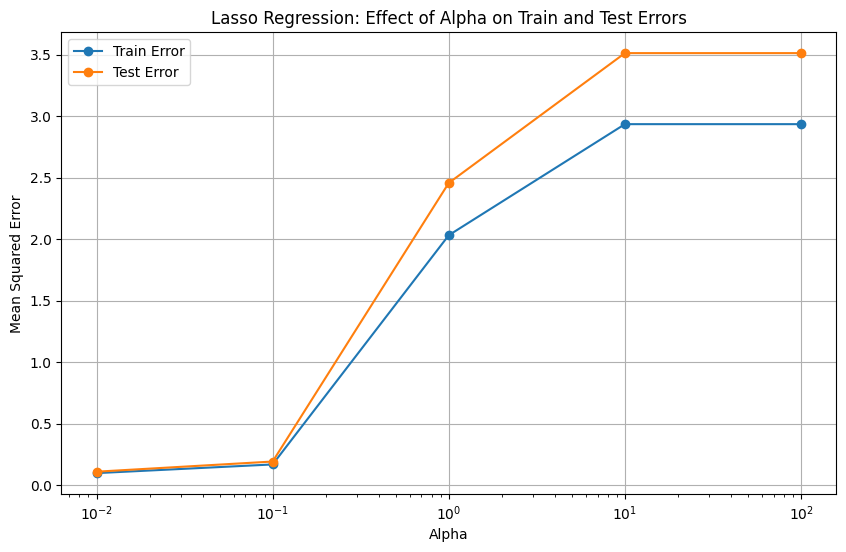

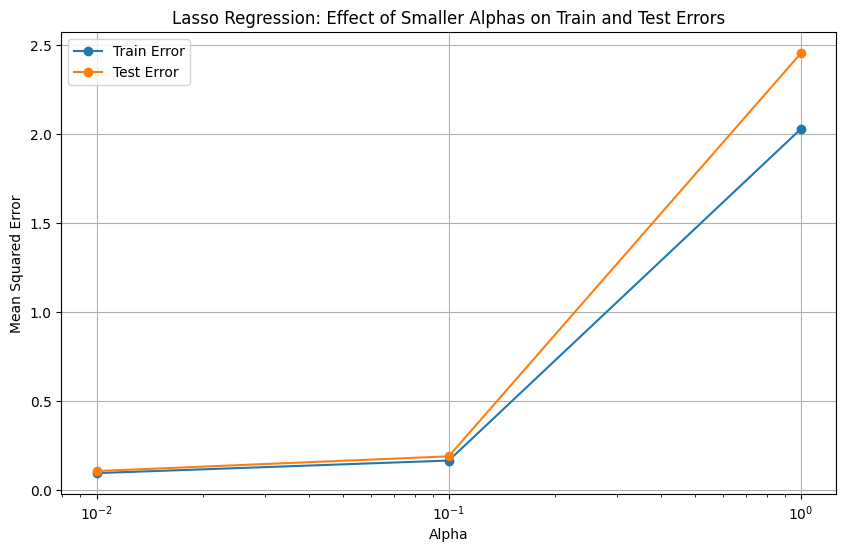

[0.10829759251324449,
 0.19100925087408285,
 2.4566637115060184,
 3.5125457294028717,
 3.5125457294028717]

In [47]:
# Plot the training and testing errors
plt.figure(figsize=(10, 6))
plt.plot(lasso_alphas, lasso_train_errors, label='Train Error', marker='o')
plt.plot(lasso_alphas, lasso_test_errors, label='Test Error', marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Lasso Regression: Effect of Alpha on Train and Test Errors')
plt.legend()
plt.grid(True)
plt.show()

# Plot the results for smaller alpha values only (0.01, 0.1, 1)
small_alphas = lasso_alphas[:3]
small_train_errors = lasso_train_errors[:3]
small_test_errors = lasso_test_errors[:3]

plt.figure(figsize=(10, 6))
plt.plot(small_alphas, small_train_errors, label='Train Error', marker='o')
plt.plot(small_alphas, small_test_errors, label='Test Error', marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Lasso Regression: Effect of Smaller Alphas on Train and Test Errors')
plt.legend()
plt.grid(True)
plt.show()

### Conclusion
* **Optimal Regularization:** The best performance (lowest test errors) occurs for smaller alpha values. Among these, alpha values closer to 0.01 or 0.1 seem to provide a good balance between bias and variance.
* **Underfitting with High Alpha:** As alpha increases beyond a certain threshold (around 1), both train and test errors increase, indicating that the model starts to underfit due to excessive regularization.
* **No Improvement with Very High Alpha:** For very high alpha values (100), there is no improvement in errors, suggesting that the model is overly constrained and unable to capture the underlying patterns in the data.

## Logistic Regression with Multiclass Classification Exercise
Create a logistic regression model to classify fashion items in the Fashion MNIST dataset. Use softmax activation function for multiclass classification.

In [48]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

In [49]:
# Load data
fashion_mnist = fetch_openml('Fashion-MNIST')

# Extract features and target
X = fashion_mnist.data
y = fashion_mnist.target.astype('int32')  # convert targets to integers

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [50]:
# Create and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', random_state=42)
log_reg.fit(X_train, y_train)


C:\Users\sh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

Accuracy: 0.8444285714285714
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79      1394
           1       0.95      0.97      0.96      1402
           2       0.76      0.74      0.75      1407
           3       0.85      0.85      0.85      1449
           4       0.74      0.78      0.76      1357
           5       0.93      0.92      0.93      1449
           6       0.65      0.59      0.62      1407
           7       0.90      0.94      0.92      1359
           8       0.92      0.93      0.92      1342
           9       0.95      0.93      0.94      1434

    accuracy                           0.84     14000
   macro avg       0.84      0.84      0.84     14000
weighted avg       0.84      0.84      0.84     14000



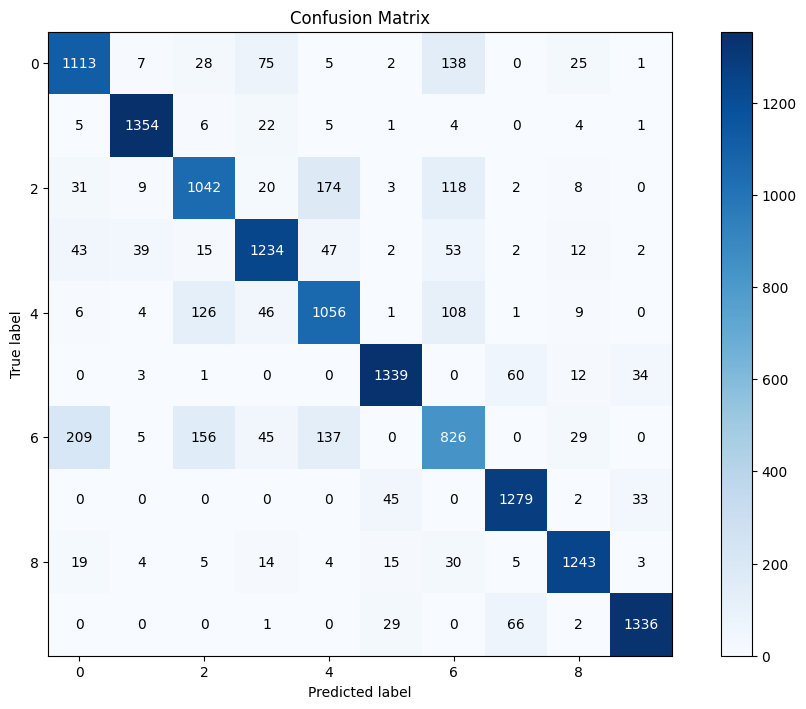

In [55]:
# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Optionally, display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Set tick marks and labels
class_names = np.unique(y_test)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add labels to each cell
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


## Softmax Function Exercise
Write a Python function to compute softmax outputs for a given input vector.
Test the function with different input vectors

In [63]:
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Subtracting the maximum value for numerical stability
    return exp_x / np.sum(exp_x, axis=0)

# Test the function with different input vectors
input_vector1 = np.array([1, 2, 3])
input_vector2 = np.array([0.5, 1.0, 2.0])
input_vector3 = np.array([-1, 0, 1])

print("Softmax output for input vector 1:", softmax(input_vector1))
print("Softmax output for input vector 2:", softmax(input_vector2))
print("Softmax output for input vector 3:", softmax(input_vector3))

Softmax output for input vector 1: [0.09003057 0.24472847 0.66524096]
Softmax output for input vector 2: [0.14024438 0.2312239  0.62853172]
Softmax output for input vector 3: [0.09003057 0.24472847 0.66524096]


## Support Vector Machine (SVM) Exercise
Build an SVM model using the scikit-learn library. Explore both linear and
kernel-based SVMs and examine the effects of different kernel functions.


In [56]:
from sklearn.svm import SVC

In [64]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [65]:
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
print('Linear SVM Accuracy:', accuracy_score(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))


Linear SVM Accuracy: 0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [60]:
svm_poly = SVC(kernel='poly', degree=3, C=1.0)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
print('Polynomial SVM Accuracy:', accuracy_score(y_test, y_pred_poly))
print(classification_report(y_test, y_pred_poly))


Polynomial SVM Accuracy: 0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.87      1.00      0.93        13
           2       1.00      0.85      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [61]:
svm_rbf = SVC(kernel='rbf', gamma='scale', C=1.0)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
print('RBF SVM Accuracy:', accuracy_score(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))


RBF SVM Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

